<Axes: xlabel='alpha', ylabel='total'>

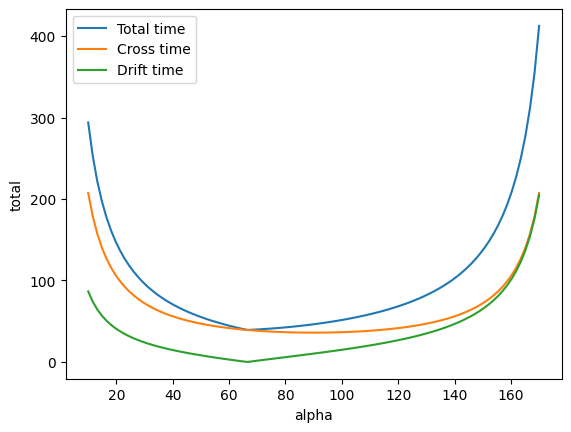

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns


def calculate_t_total(alpha_deg):
    v_total = 10 / 3.6  # m/s
    v_water = 4 / 3.6  # m/s
    d = 100  # m
    alpha = np.radians(alpha_deg)  # rad

    v_x = v_total * np.cos(alpha)
    v_y = v_total * np.sin(alpha)

    t_cross = d / v_y

    d_drift = np.abs((v_x - v_water) * t_cross)

    if d_drift > 0:
        t_drift = d_drift / (v_total + v_water)
    else:
        t_drift = d_drift / (v_total - v_water)

    t_total = t_cross + t_drift

    return {"cross": t_cross, "drift": t_drift, "total": t_total, "v_water": v_water}


alphas_deg = np.linspace(10, 170, 100)
times = pd.DataFrame([calculate_t_total(alpha_deg) for alpha_deg in alphas_deg])
times["alpha"] = alphas_deg


sns.lineplot(data=times, x="alpha", y="total", label="Total time")
sns.lineplot(data=times, x="alpha", y="cross", label="Cross time")
sns.lineplot(data=times, x="alpha", y="drift", label="Drift time")